In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from scipy import stats
from scipy.stats import ranksums
from adjustText import adjust_text
import math

In [6]:
def map_color(a,sig,picked1,picked2):
    log2FoldChange, symbol,nlog10= a
    # cutoff value for significance
    # DISCUSS CUTOFF RATES
    if symbol in picked1:
            return 'ATGs'
    if symbol in picked2:
            return 'FIP200'
    if abs(log2FoldChange) < 2 or nlog10<(-np.log10(0.05)):
            return 'not_significant'
    if sig=="all":
        return 'significant'
    if sig=="none":
        return 'not_significant'

In [7]:
def volcano_plots (data, title, path,axs,sig,picked1,picked2):

    #picked1 and picked2 are list of genes that the user wants to pick --> these will have specific colors later in the code
    data['color'] = data[['log2fc', 'Gene Symbol',"nlog10"]].apply(map_color, axis = 1, sig=sig, picked1=picked1, picked2=picked2)

    print(axs)
    sns.scatterplot(data=data[data["color"]=="not_significant"], x='log2fc', y='nlog10', color='#d3d3d3', label='not_significant',ax=axs,legend=False)
    sns.scatterplot(data=data[data["color"]=="significant"], x='log2fc', y='nlog10', color='#FF7F00', label='significant',ax=axs,legend=False)

    # Plot 'ATGs' and 'FIP200' on top
    sns.scatterplot(data=data[data["color"]=="ATGs"], x='log2fc', y='nlog10', color='#9600FF', label='ATGs',ax=axs,legend=False)
    sns.scatterplot(data=data[data["color"]=="FIP200"], x='log2fc', y='nlog10', color='#0072B2', label='FIP200',ax=axs,legend=False)

    axs.axhline(-np.log10(0.05), zorder = 0, c = 'k', lw = 2, ls = '--')
    axs.axvline(2, zorder = 0, c = 'k', lw = 2, ls = '--')
    axs.axvline(-2, zorder = 0, c = 'k', lw = 2, ls = '--')

    texts = []
    for i in range(len(data)):
        if data.iloc[i].gene_symbol in picked1 or data.iloc[i].gene_symbol in picked2:

            texts.append(axs.text(x = data.iloc[i].log2fc + 0.025, y = data.iloc[i].nlog10 + 0.025, s = data.iloc[i].gene_symbol,
                                 fontsize = 12, weight = 'bold'))
        if sig=="none":
            continue

        if (data.iloc[i].log2fc > 2 or data.iloc[i].log2fc < -2)  and abs(data.iloc[i].nlog10) > (-np.log10(0.05)):
            if data.iloc[i].gene_symbol not in picked1 and data.iloc[i].gene_symbol not in picked2:

                    texts.append(axs.text(x = data.iloc[i].log2fc+ 0.025, y = data.iloc[i].nlog10+ 0.025, s = data.iloc[i].gene_symbol,
                                     fontsize = 12))

    adjust_text(texts, arrowprops = dict(arrowstyle = '-', color = 'k'), ax=axs)

    #plt.legend(loc = 1, bbox_to_anchor = (1.4,1), frameon = False, prop = {'weight':'bold'})

    for axis in ['bottom', 'left']:
        axs.spines[axis].set_linewidth(2)
        axs.spines[axis].set_color('black')

    axs.spines['top'].set_visible(False)
    axs.spines['right'].set_visible(False)

    axs.set_xlabel("$log_{2}$ Fold Change", fontdict={'fontname': 'Arial', 'fontsize': 12, 'fontweight': 'bold'} )
    axs.set_ylabel("-$log_{10}$ p-value", fontdict={'fontname': 'Arial', 'fontsize': 12, 'fontweight': 'bold'})

    axs.set_title(title, fontdict={'fontname': 'Arial', 'fontsize': 18, 'fontweight': 'bold'})

    #plt.savefig(f"{path}/{title}.png")

    #plt.show()


/Users/janmatthias/Library/Mobile Documents/com~apple~CloudDocs/Master Thesis/proteomics/sum_normalized/bayi_images/csv/de_Jan_deltaC_vs_WT.csv
0 0
Axes(0.125,0.712609;0.227941x0.167391)
/Users/janmatthias/Library/Mobile Documents/com~apple~CloudDocs/Master Thesis/proteomics/sum_normalized/bayi_images/csv/de_Jan_deltaC_vs_HA.csv
0 1
Axes(0.398529,0.712609;0.227941x0.167391)
/Users/janmatthias/Library/Mobile Documents/com~apple~CloudDocs/Master Thesis/proteomics/sum_normalized/bayi_images/csv/de_Jan_deltaC_vs_s3.csv
0 2
Axes(0.672059,0.712609;0.227941x0.167391)
/Users/janmatthias/Library/Mobile Documents/com~apple~CloudDocs/Master Thesis/proteomics/sum_normalized/bayi_images/csv/de_Jan_3E_vs_WT.csv
1 0
Axes(0.125,0.511739;0.227941x0.167391)
/Users/janmatthias/Library/Mobile Documents/com~apple~CloudDocs/Master Thesis/proteomics/sum_normalized/bayi_images/csv/de_Jan_3E_vs_HA.csv
1 1
Axes(0.398529,0.511739;0.227941x0.167391)
/Users/janmatthias/Library/Mobile Documents/com~apple~CloudDocs/

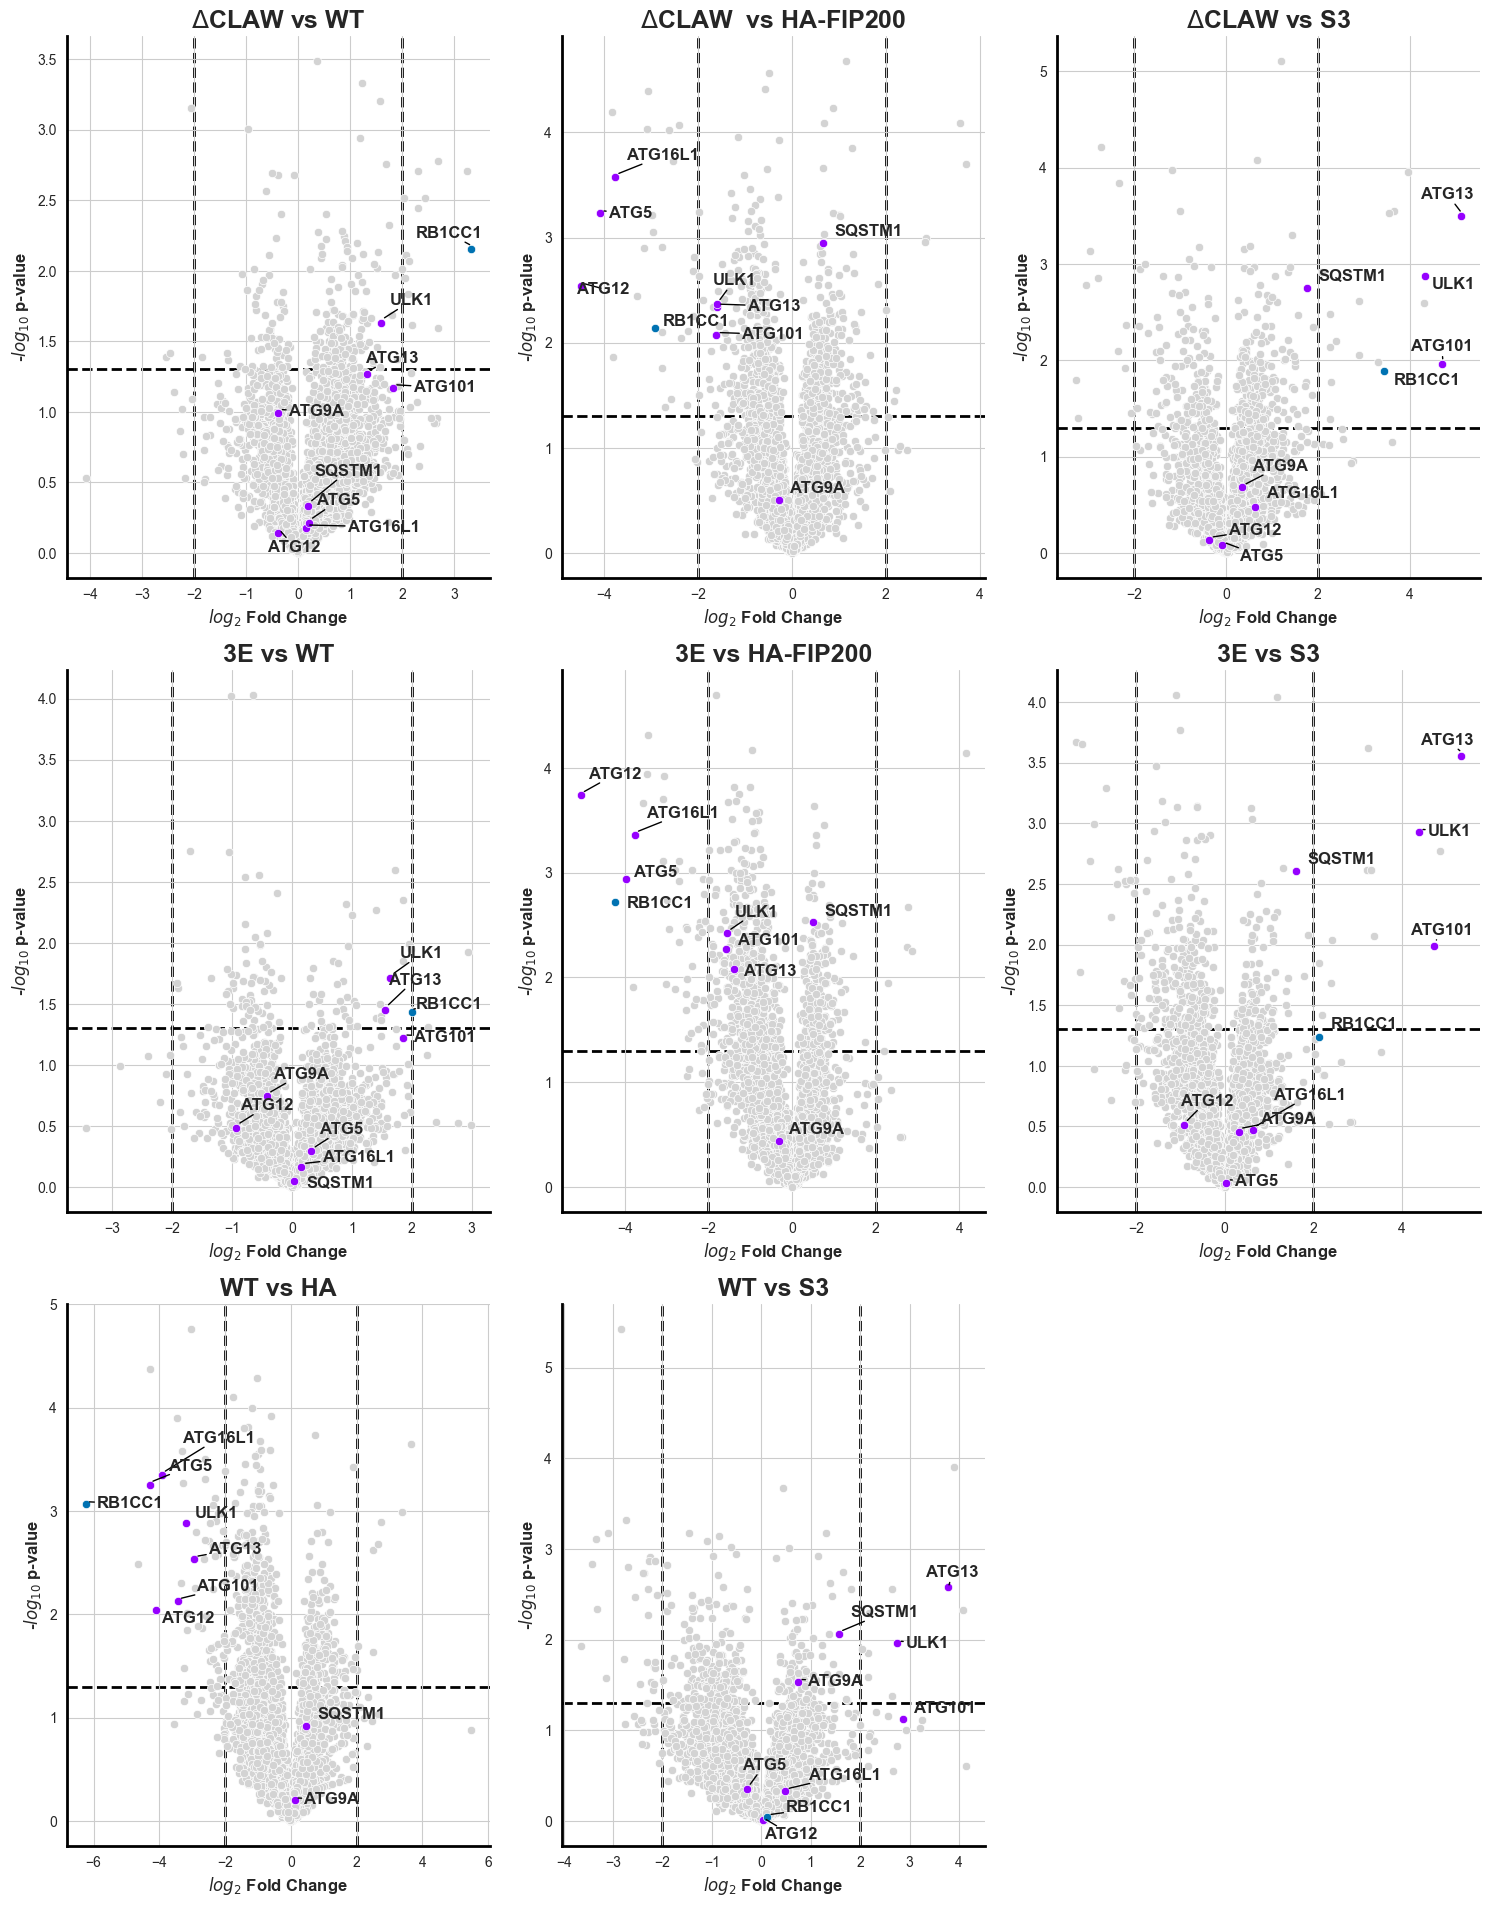

In [ ]:
import os
import glob

output="/Users/janmatthias/Library/Mobile Documents/com~apple~CloudDocs/Master Thesis/proteomics/sum_normalized/plots_JM"
names=["$\Delta$CLAW vs WT","$\Delta$CLAW  vs HA-FIP200","$\Delta$CLAW vs S3",
       "3E vs WT", "3E vs HA-FIP200", "3E vs S3",
       "WT vs HA","WT vs S3"]
# Define the path
a = '/Users/janmatthias/Library/Mobile Documents/com~apple~CloudDocs/Master Thesis/proteomics/sum_normalized/bayi_images/csv/'  # Replace with your directory path

files=["de_Jan_deltaC_vs_WT.csv","de_Jan_deltaC_vs_HA.csv","de_Jan_deltaC_vs_s3.csv",
        "de_Jan_3E_vs_WT.csv","de_Jan_3E_vs_HA.csv","de_Jan_3E_vs_s3.csv",
       "de_Jan_WT_vs_HA.csv","de_Jan_WT_vs_S3.csv"]

rows = 4
columns = 3
fig, axes = plt.subplots(rows, columns, figsize=(15, 25))

picked1 = ["ATG13", "ATG12","ATG16L1","ATG9A","ATG101","ATG5","ATG8", "ULK1", "MAP1LC3B", "SQSTM1", "NBR1"]
picked2 = ["RB1CC1"]


# Iterate through the files
for i, file in enumerate(files):

        path= a+ file
        print(path)
        data = pd.read_csv(path)

        data['nlog10'] = -np.log10(data.pvalue)
        data["gene_symbol"]=data["Gene Symbol"]

        row_index = i // columns
        col_index = i % columns

        axs = axes[row_index, col_index]

        print(row_index, col_index)

        volcano_plots(data,names[i],output,axs,"none",picked1,picked2)

for j in range(i+1, rows * columns):
    fig.delaxes(axes.flatten()[j])

plt.tight_layout()
plt.savefig(f"/Users/janmatthias/Library/Mobile Documents/com~apple~CloudDocs/Master Thesis/proteomics/all_volcano_plots_sum_normalised.png")
plt.show()